# Figures for n=2, we'll plot a figure for each delta for a better analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from matplotlib.lines import Line2D

### Here we observe $\lambda$ evolution for n=2 (exponential) and for n=1 (linear)

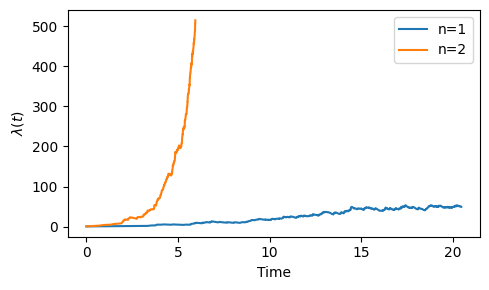

In [24]:
K = 5*10**2
mu = 1.0
plt.figure(figsize=(5,3))
for n in np.arange(1,3):
    times, rate = generate_series(K, n, mu)
    plt.plot(times, rate, label=f'n={n}')
plt.legend()
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('$\lambda (t)$')
plt.tight_layout()

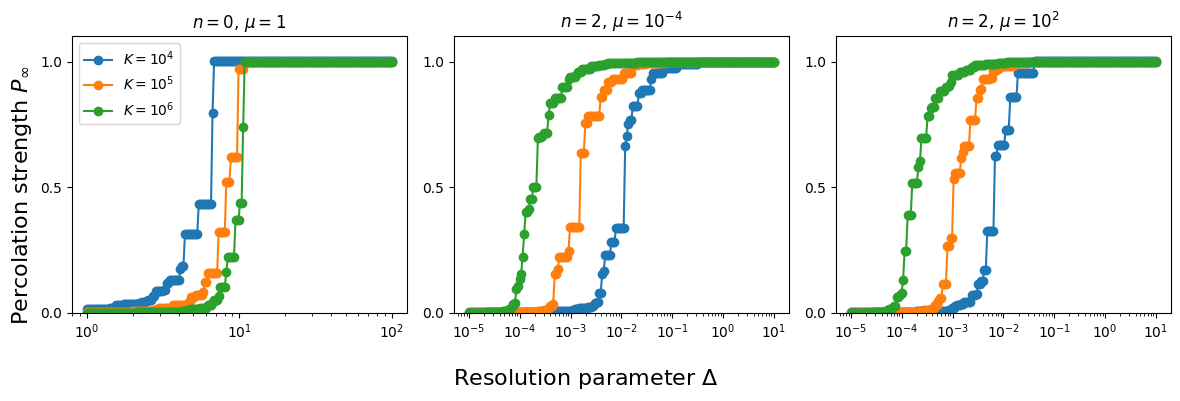

In [6]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)
K = 10**6
mus = [1, 10**-4, 10**2]
ns = [0, 2, 2]
labels = ['$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(0, 2, num = 200, base = 10), np.logspace(-5, 1, num = 200, base = 10), np.logspace(-5, 1, num = 200, base = 10)]
for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        times_between_events, _, _ = generate_series_perc(K, n, mu)
        delta = deltas[i]
        percolation_strength = calculate_percolation_strength(times_between_events, delta)
        ax.plot(delta, percolation_strength, marker='o')
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
#fig.axes[0].minorticks_off()
#fig.axes[2].minorticks_off()
fig.axes[0].set_title('$n=0$, $\mu=1$')
fig.axes[1].set_title('$n=2$, $\mu=10^{-4}$')
fig.axes[2].set_title('$n=2$, $\mu=10^{2}$')
fig.axes[0].legend(labels, loc='upper left', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()

### We observe that for $K=10^6$ events, $\Delta_1^*\approx 10^{-4}$. We'll fix this value and study another orders of magnitude first

## First configuration $\mu=10^{-4}$

In [5]:
K = 10**6
mu = 10**-4
n = 2
times, _ = generate_series(K, n, mu)

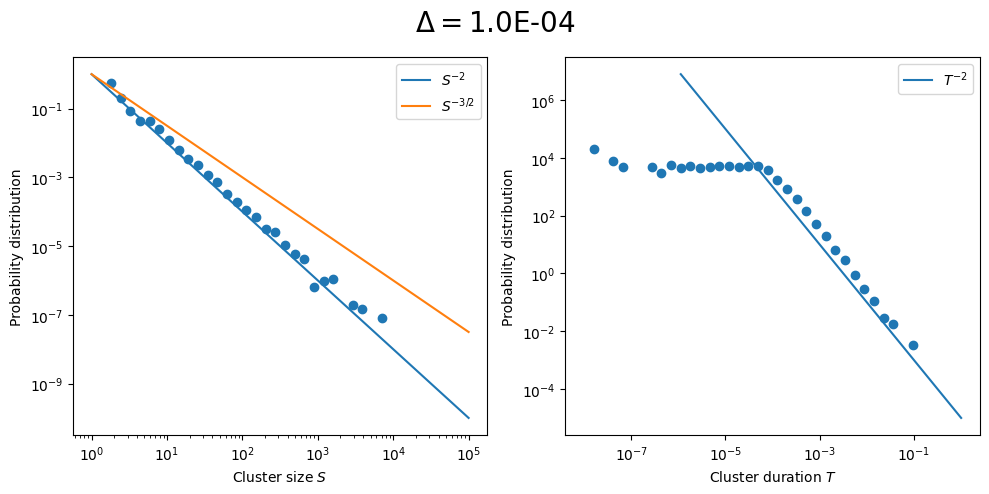

In [20]:
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

delta = 10**-4
clusters = identify_clusters(times, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

s_bins = np.logspace(0, 5, num = 40, base = 10)
t_bins = np.logspace(-8, 0, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E}', fontsize=20)

fig.tight_layout()


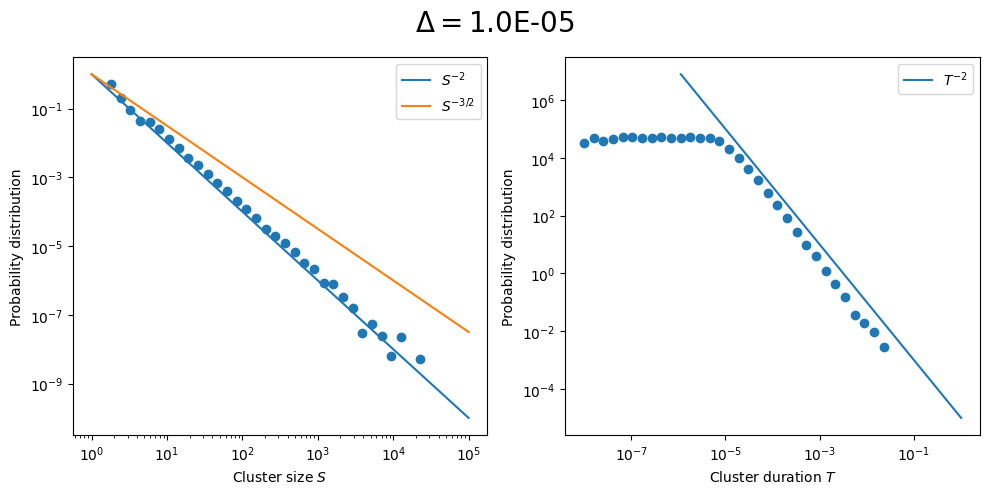

In [21]:
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

delta = 10**-5
clusters = identify_clusters(times, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

s_bins = np.logspace(0, 5, num = 40, base = 10)
t_bins = np.logspace(-8, 0, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E}', fontsize=20)

fig.tight_layout()


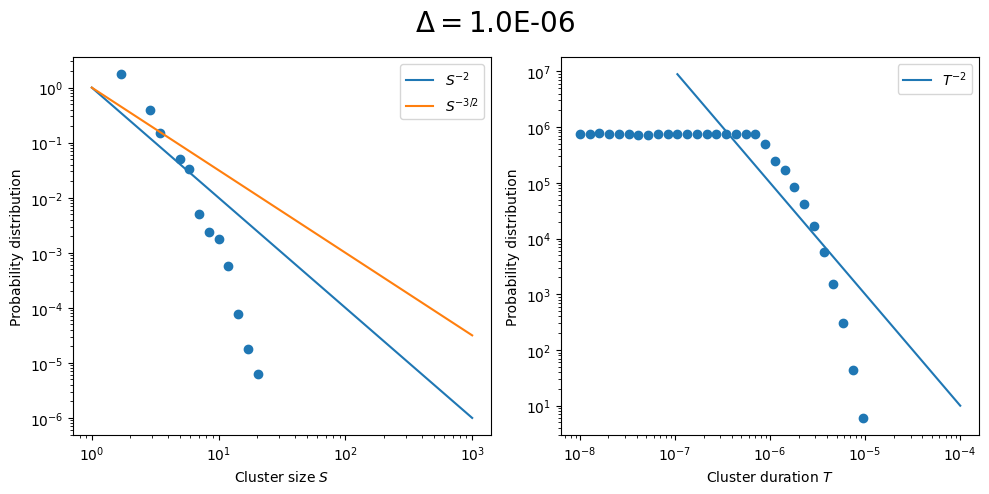

In [27]:
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

delta = 10**-6
clusters = identify_clusters(times, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

s_bins = np.logspace(0, 3, num = 40, base = 10)
t_bins = np.logspace(-8, -4, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-7
y_s2 = s_bins**(-3/2)

s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E}', fontsize=20)

fig.tight_layout()


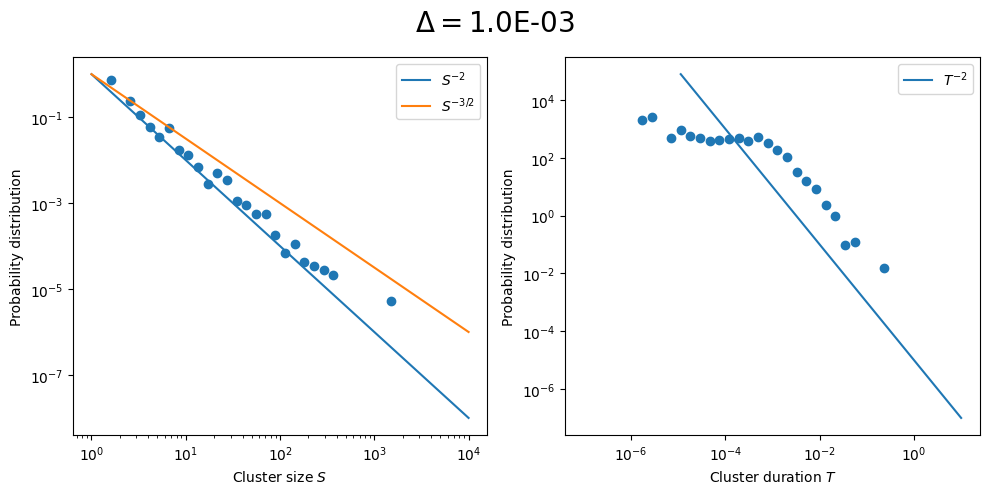

In [28]:
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

delta = 10**-3
clusters = identify_clusters(times, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

s_bins = np.logspace(0, 4, num = 40, base = 10)
t_bins = np.logspace(-7, 1, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E}', fontsize=20)

fig.tight_layout()


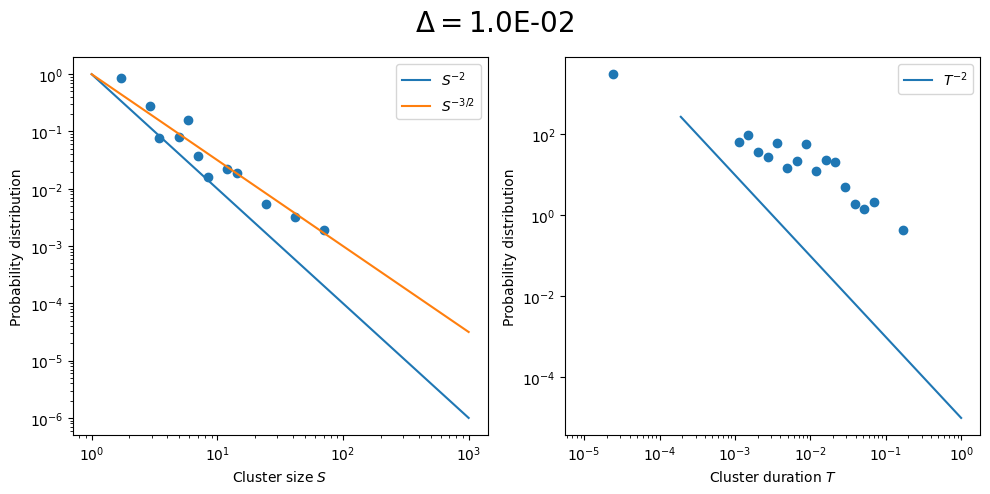

In [30]:
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

delta = 10**-2
clusters = identify_clusters(times, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

s_bins = np.logspace(0, 3, num = 40, base = 10)
t_bins = np.logspace(-5, 0, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E}', fontsize=20)

fig.tight_layout()


## Second configuration ($\mu=100$), as we can see, $\Delta_1^*\approx 10^{-4}$ 

In [34]:
K = 10**6
mu = 10**-4
n = 2
times, _ = generate_series(K, n, mu)

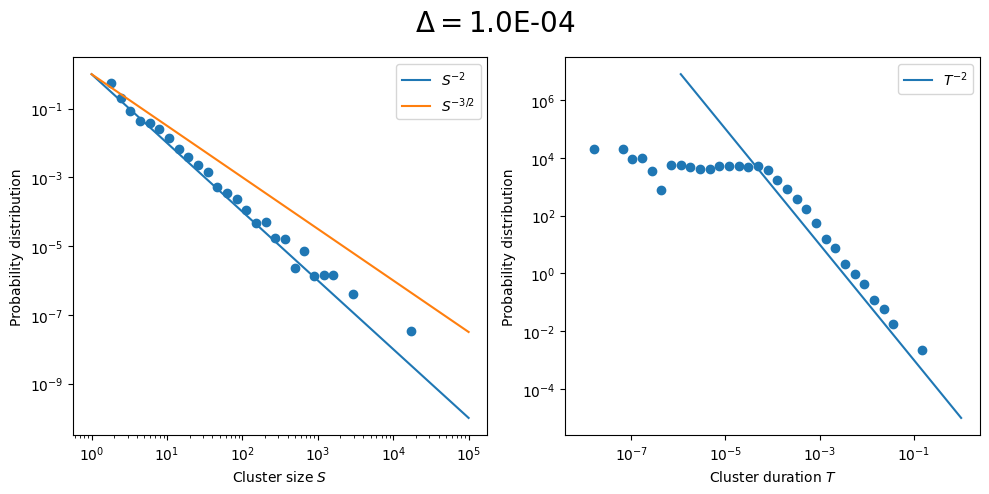

In [50]:
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

delta = 10**-4
clusters = identify_clusters(times, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

s_bins = np.logspace(0, 5, num = 40, base = 10)
t_bins = np.logspace(-8, 0, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E}', fontsize=20)

fig.tight_layout()


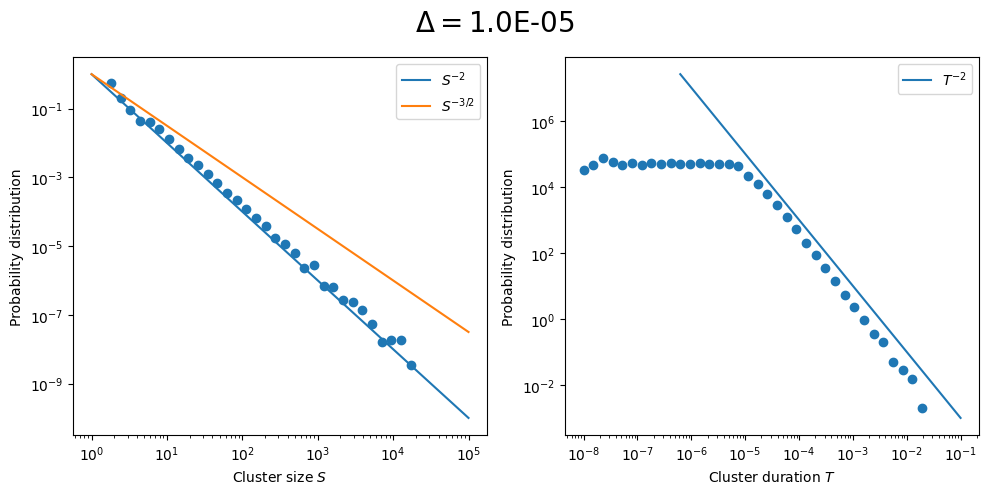

In [51]:
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

delta = 10**-5
clusters = identify_clusters(times, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

s_bins = np.logspace(0, 5, num = 40, base = 10)
t_bins = np.logspace(-8, -1, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E}', fontsize=20)

fig.tight_layout()


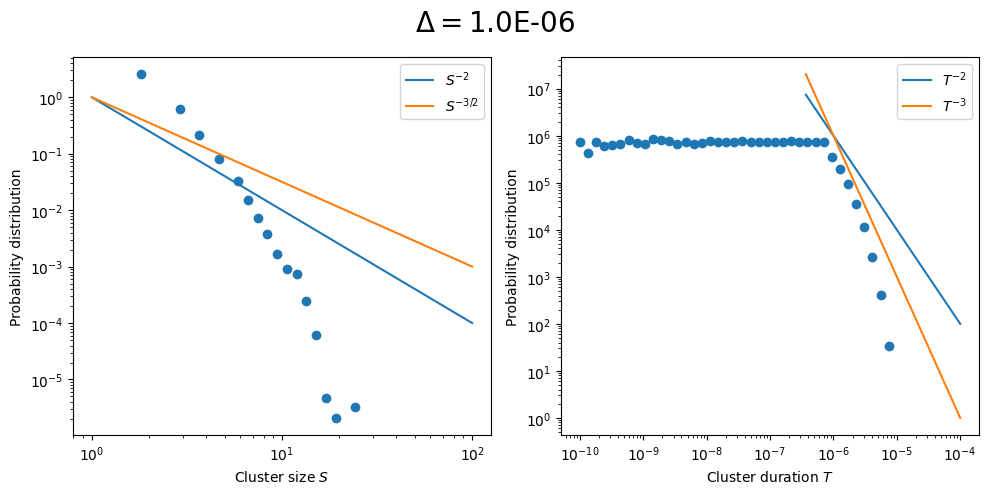

In [65]:
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

delta = 10**-6
clusters = identify_clusters(times, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

s_bins = np.logspace(0, 2, num = 40, base = 10)
t_bins = np.logspace(-10, -5, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-8
y_s2 = s_bins**(-3/2)
y_t2 = t_bins**(-3)*10**-15

s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[20:]*10, y_t[20:], label='$T^{-2}$')
ax1.plot(t_bins[20:]*10, y_t2[20:], label='$T^{-3}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E}', fontsize=20)

fig.tight_layout()


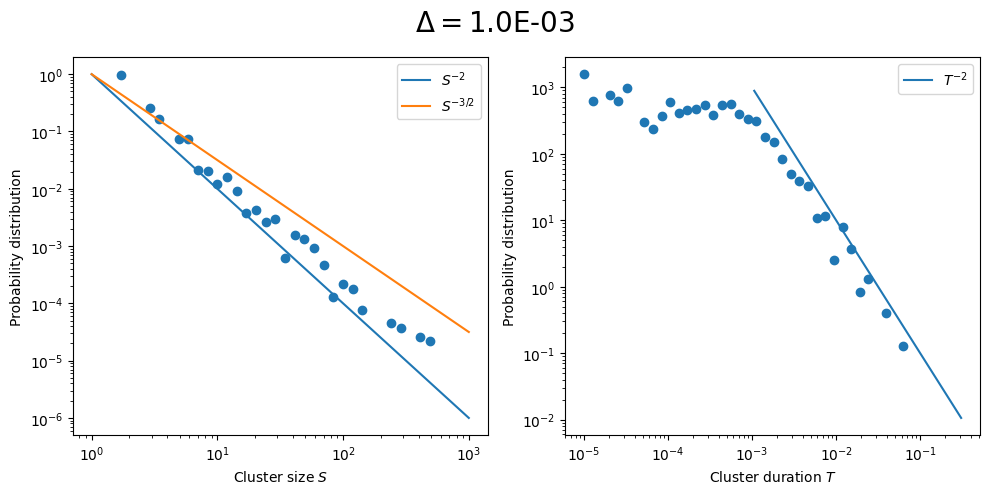

In [67]:
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

delta = 10**-3
clusters = identify_clusters(times, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

s_bins = np.logspace(0, 3, num = 40, base = 10)
t_bins = np.logspace(-5, -1, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-5
y_s2 = s_bins**(-3/2)

s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:35]*10, y_t[10:35], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E}', fontsize=20)

fig.tight_layout()


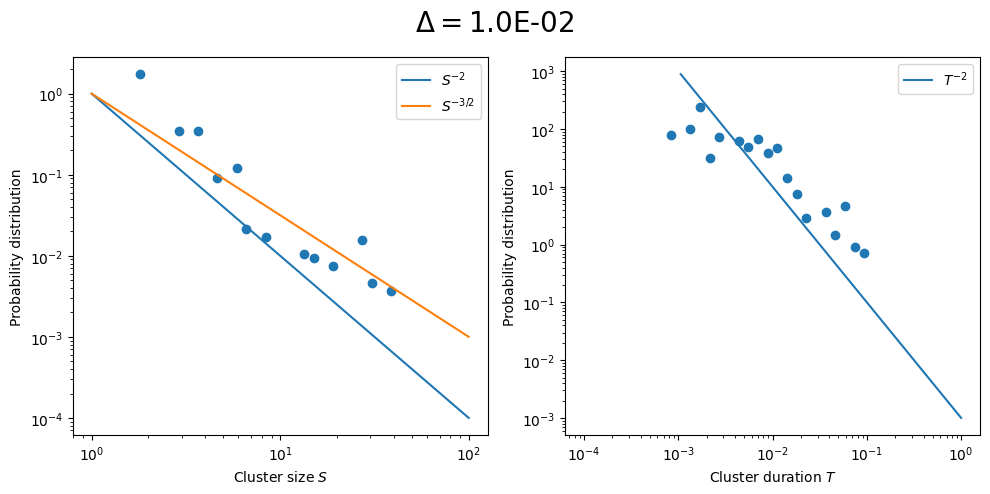

In [54]:
fig = plt.figure(figsize=(10, 5))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

delta = 10**-2
clusters = identify_clusters(times, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

s_bins = np.logspace(0, 2, num = 40, base = 10)
t_bins = np.logspace(-4, 0, num = 40, base = 10)
y_s = s_bins**(-2)
y_t = t_bins**(-2)*10**-3
y_s2 = s_bins**(-3/2)

s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
ax0.scatter(s_bins[:-1], s_hist[0])
ax0.plot(s_bins, y_s, label='$S^{-2}$')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.legend()
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')

t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
ax1.scatter(t_bins[:-1], t_hist[0])
ax1.plot(t_bins[10:], y_t[10:], label='$T^{-2}$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')
ax1.legend()

fig.suptitle(f'$\Delta=${delta:.1E}', fontsize=20)

fig.tight_layout()